In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib.testing import param


In [2]:
df = pd.read_csv('/Users/derkalven/Documents/Data Science/Loan_Status/loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

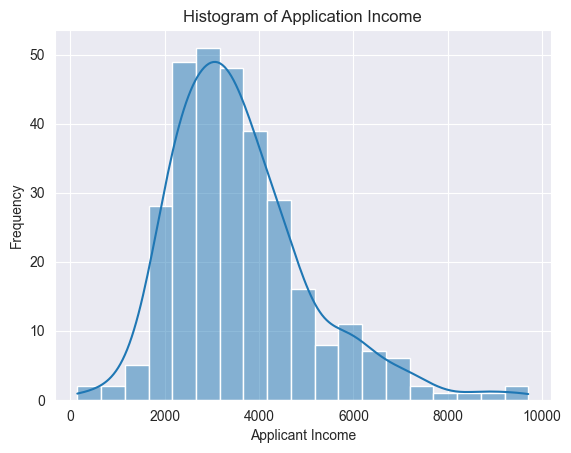

In [11]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histogram of Application Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

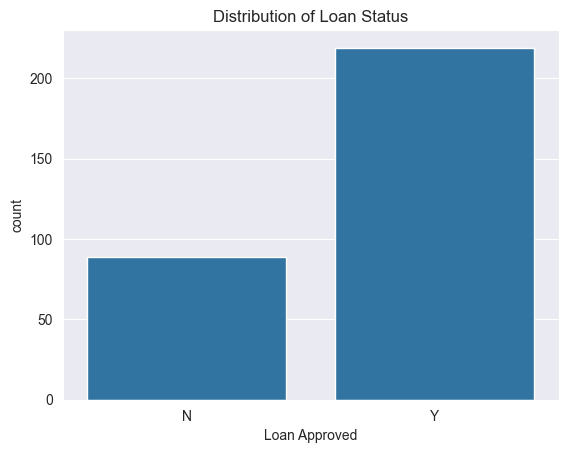

In [12]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Approved")
plt.show()


In [13]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


In [14]:
avg_loan_amount_by_education=df.groupby("Education")["LoanAmount"].mean().reset_index()

<Axes: xlabel='LoanAmount', ylabel='Education'>

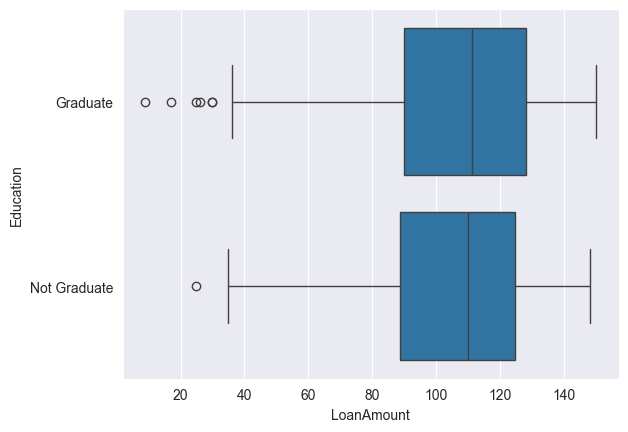

In [15]:
sns.boxplot(x="LoanAmount", y="Education", data=df, orient="h")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

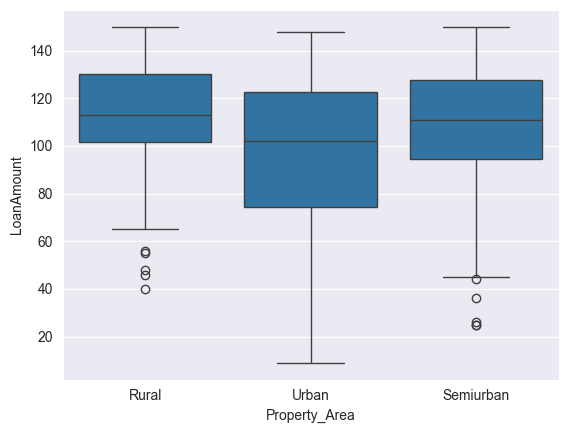

In [16]:
sns.boxplot(x="Property_Area", y="LoanAmount", data=df)

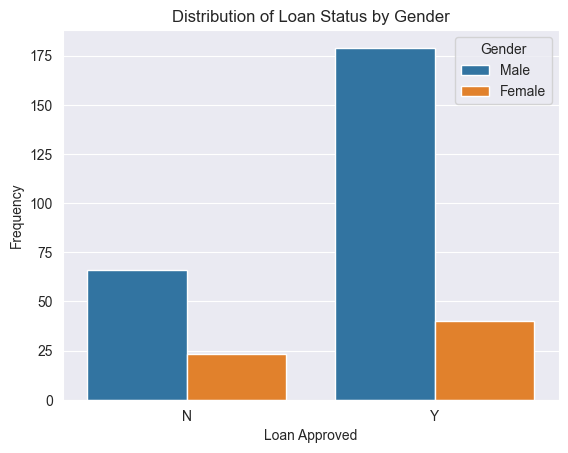

In [17]:
sns.countplot(x="Loan_Status", hue="Gender", data=df)
plt.title("Distribution of Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Frequency")
plt.show()

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


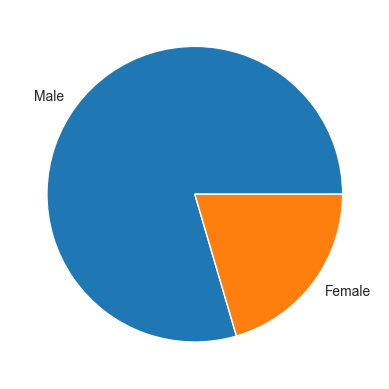

In [19]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [20]:
loan_status_by_married=df.groupby("Married")["Loan_Status"].value_counts().unstack()

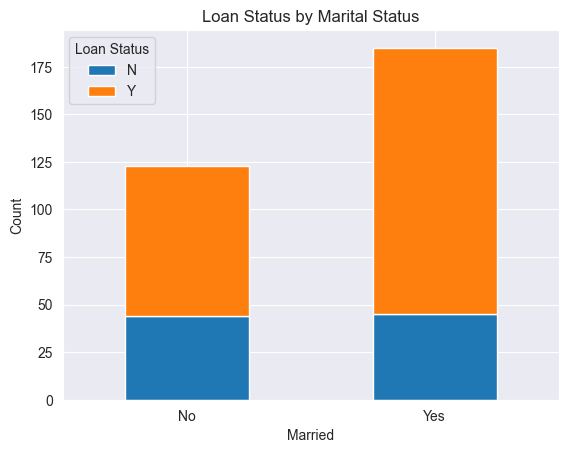

In [21]:
loan_status_by_married.plot(kind="bar",stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status", loc="upper left")
plt.xticks(rotation=0)
plt.show()


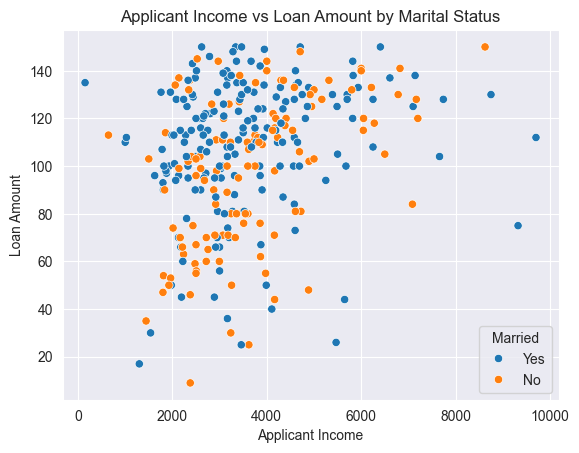

In [22]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Married", data=df)
plt.title("Applicant Income vs Loan Amount by Marital Status")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()


In [23]:
numeric_df=df.select_dtypes(include=["int64", "float64"])
numeric_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0


In [24]:
correlation_matrix=numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

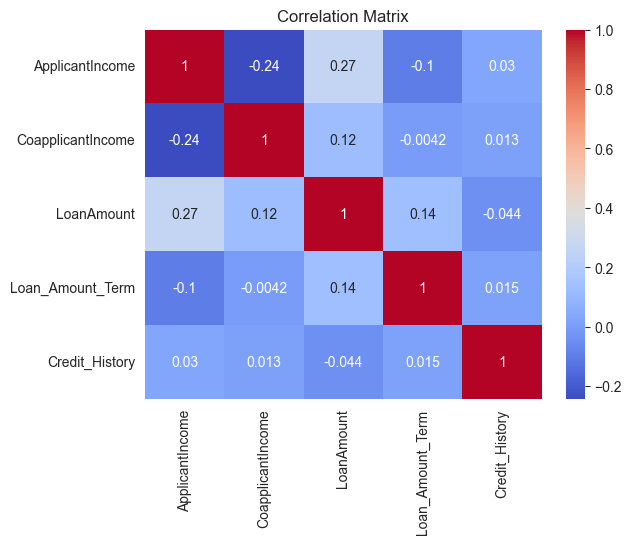

In [25]:
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")

In [26]:
avg_loan_term_by_employed=df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


<Axes: xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

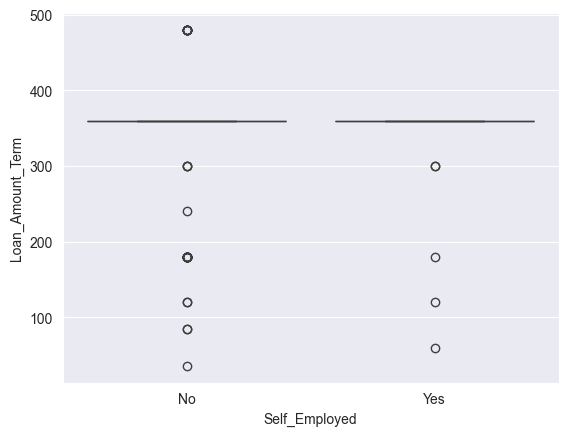

In [27]:
sns.boxplot(x="Self_Employed", y="Loan_Amount_Term", data=df)

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
X=df[["Married","ApplicantIncome","Education", "LoanAmount", "Credit_History"]]

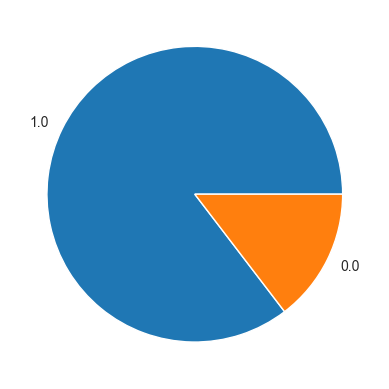

In [30]:
df["Credit_History"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [31]:
y=df[["Loan_Status"]]

In [32]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [33]:
y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])
y

/var/folders/l_/vpbrnl6s4ts1s9ytzljp6xhw0000gn/T/ipykernel_23948/1642867958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])


,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [329]:
X["Married"]=labelencoder.fit_transform(X["Married"])
X

/var/folders/l_/vpbrnl6s4ts1s9ytzljp6xhw0000gn/T/ipykernel_15181/3206840024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"]=labelencoder.fit_transform(X["Married"])


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,Graduate,128.0,1.0
1,1,3000,Graduate,66.0,1.0
2,1,2583,Not Graduate,120.0,1.0
3,0,6000,Graduate,141.0,1.0
4,1,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,1,5703,Graduate,128.0,1.0
377,1,3232,Graduate,108.0,1.0
378,0,2900,Graduate,71.0,1.0
379,1,4106,Graduate,40.0,1.0


In [34]:
X["Education"]=labelencoder.fit_transform(X["Education"])

X

/var/folders/l_/vpbrnl6s4ts1s9ytzljp6xhw0000gn/T/ipykernel_23948/2076148785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"]=labelencoder.fit_transform(X["Education"])


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,0,128.0,1.0
1,Yes,3000,0,66.0,1.0
2,Yes,2583,1,120.0,1.0
3,No,6000,0,141.0,1.0
4,Yes,2333,1,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,0,128.0,1.0
377,Yes,3232,0,108.0,1.0
378,No,2900,0,71.0,1.0
379,Yes,4106,0,40.0,1.0


In [35]:
X["Married"]=labelencoder.fit_transform(X["Married"])

X

/var/folders/l_/vpbrnl6s4ts1s9ytzljp6xhw0000gn/T/ipykernel_23948/2322993359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"]=labelencoder.fit_transform(X["Married"])


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X = scaler.fit_transform(X)
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [38]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test, predictions)))


In [42]:
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train, y_train)

/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
log_prediction=log_model.predict(X_test)

In [132]:
modelperformance(log_prediction)

Accuracy score in model is 0.8387096774193549


In [208]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors" : [3,5,7],
              "weights": ["uniform", "distance"],}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [209]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [210]:
knpreds = gridkn.predict(X_test)

In [211]:
modelperformance(knpreds)

Accuracy score in model is 0.6935483870967742


In [212]:
from sklearn.svm import SVC


In [236]:
svm = SVC()
param_grid_svc = {"C": [0.01,0.04,0.05,],"kernel":["linear", "rbf", "poly"]}

In [237]:
gridsvc = GridSearchCV(svm, param_grid_svc)

In [225]:
gridsvc.fit(X_train, y_train)

/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [238]:
gridsvc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.04, 0.05],
                         'kernel': ['linear', 'rbf', 'poly']})

In [239]:
pred_svc = gridsvc.predict(X_test)
modelperformance(pred_svc)

Accuracy score in model is 0.8225806451612904


In [241]:
gridsvc.best_params_

{'C': 0.05, 'kernel': 'linear'}

In [242]:
joblib.dump(gridsvc, 'model.pkl')

['model.pkl']

In [243]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [244]:
import joblib

testmodel = joblib.load("model.pkl")

In [249]:
testmodel.predict([[0,3500,1,100,1]])[0]


/Users/derkalven/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


np.int64(1)